# Installing the necessary packages and dependencies

In [0]:
# Installing the dependencies and nns libraries

!pip install 2to3

!pip install annoy
!sudo apt-get install libomp-dev

!pip install nearpy

!pip install ngt

!git clone https://github.com/primetang/pyflann.git
!2to3 -w pyflann
%cd pyflann
!python setup.py install
%cd ../

!pip install git+https://github.com/vioshyvo/mrpt/

!pip install pynndescent

!pip install datasketch

!pip install faiss

!pip install rpforest

!pip install hnswlib

!pip install nmslib

!pip install n2

!git clone https://github.com/ryanrhymes/panns
!2to3 -w panns
%cd panns
!python setup.py install
%cd ../

!git clone https://github.com/aaalgo/kgraph
!2to3 -w kgraph
%cd kgraph
!python setup.py install
%cd ../

!git clone https://github.com/ipsarros/DolphinnPy
!2to3 -w DolphinnPy

!pip install FALCONN

!pip install nanopq

     |████████████████████████████████| 645kB 2.7MB/s 
  Created wheel for annoy: filename=annoy-1.16.3-cp36-cp36m-linux_x86_64.whl size=297325 sha256=6044a0c88e387feac2e7e903ed320dcab3c768f739286fe6fff62dde9106ab67
  Stored in directory: /root/.cache/pip/wheels/f3/01/54/6ef760fe9f9fc6ba8c19cebbe6358212b5f3b5b0195c0b813f
Successfully built annoy
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libomp5
Suggested packages:
  libomp-doc
The following NEW packages will be installed:
  libomp-dev libomp5
0 upgraded, 2 newly installed, 0 to remove and 25 not upgraded.
Need to get 239 kB of archives.
After this operation, 804 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libomp5 amd64 5.0.1-1 [234 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libomp-dev amd64 5.0.1-1 [5,088 B]
Fetched 239 kB in 2s (113 kB/s)
debconf: 

# Embedding Selection - Facenet/DR-GAN

In [0]:
# Loading FaceNet Features

import time
import numpy as np
import pandas as pd

db = pd.read_pickle('/content/drive/My Drive/database.csv') #FaceNet Features
feature = db['embedding']

NUMBER_OF_SAMPLES = 5000
NUMBER_OF_FEATURES = 512

fnp = np.ndarray(shape=(NUMBER_OF_SAMPLES,NUMBER_OF_FEATURES))
for f in range(NUMBER_OF_SAMPLES):
  for e in range(NUMBER_OF_FEATURES):
    fnp[f][e] = feature[f][0][e]

INDEX = 125
NUMBER_OF_NEIGHBOURS = 10

query = fnp[INDEX].copy()
query_reshape = np.array(query).reshape(1, -1)

fnp_float32 = fnp.copy().astype(np.float32)
query_float32 = query.copy().astype(np.float32)

query_xaxis = [1,25,50,75,100]

In [0]:
# Loading DR-GAN Features

import numpy as np
import pandas as pd

db = pd.read_pickle('/content/drive/My Drive/database2.csv') #DRGAN Features

feature = db['feature']

NUMBER_OF_SAMPLES = 5000
NUMBER_OF_FEATURES = 320

fnp = np.ndarray(shape=(NUMBER_OF_SAMPLES,NUMBER_OF_FEATURES))
for f in range(NUMBER_OF_SAMPLES):
  for e in range(NUMBER_OF_FEATURES):
    fnp[f][e] = feature[f][0][e]

INDEX = 125
NUMBER_OF_NEIGHBOURS = 10

query = fnp[INDEX].copy()
query_reshape = np.array(query).reshape(1, -1)

fnp_float32 = fnp.copy().astype(np.float32)
query_float32 = query.copy().astype(np.float32)

query_xaxis = [1,25,50,75,100]

# Neighbour Search Algorithms (For one query)

In [0]:
#!pip install annoy
#!sudo apt-get install libomp-dev

#Batch Processing is not present in Annoy

import annoy
from annoy import AnnoyIndex

t_a = AnnoyIndex(NUMBER_OF_FEATURES,'angular')
t_e = AnnoyIndex(NUMBER_OF_FEATURES,'euclidean')
for i in range(NUMBER_OF_SAMPLES):
  t_a.add_item(i,fnp[i])
  t_e.add_item(i,fnp[i])


t_a.build(NUMBER_OF_NEIGHBOURS)
t1 = time.time()
result = t_a.get_nns_by_item(INDEX,NUMBER_OF_NEIGHBOURS)
t2 = time.time()
print("AnnoyIndex (angular) : ",result)
print("Time : ",str(t2-t1))

t_e.build(NUMBER_OF_NEIGHBOURS)
t1 = time.time()
result = t_e.get_nns_by_item(INDEX,NUMBER_OF_NEIGHBOURS)
t2 = time.time()
print("AnnoyIndex (euclidean) : ",result)
print("Time : ",str(t2-t1))



AnnoyIndex (angular) :  [125, 124, 129, 126, 128, 121, 127, 123, 374, 85]
Time :  0.00015282630920410156
AnnoyIndex (euclidean) :  [125, 124, 128, 121, 127, 123, 4102, 85, 2598, 3400]
Time :  0.00014138221740722656


In [0]:
#Batch Allowed

from sklearn.neighbors import NearestNeighbors

nbrs1 = NearestNeighbors(n_neighbors=NUMBER_OF_NEIGHBOURS, algorithm='ball_tree').fit(fnp)
nbrs2 = NearestNeighbors(n_neighbors=NUMBER_OF_NEIGHBOURS, algorithm='kd_tree').fit(fnp)
nbrs3 = NearestNeighbors(n_neighbors=NUMBER_OF_NEIGHBOURS, algorithm='brute').fit(fnp)

fnp_batch = fnp[0:100]

t1 = time.time()
indices = nbrs1.kneighbors(query_reshape, return_distance=False)
t2 = time.time()
print("Sklearn (Ball Tree) : ",indices)
print("Time : ",str(t2-t1))

t1 = time.time()
indices2 = nbrs2.kneighbors(query_reshape, return_distance=False)
t2 = time.time()
print("Sklearn (KD Tree) : ",indices2)
print("Time : ",str(t2-t1))

t1 = time.time()
indices3 = nbrs3.kneighbors(query_reshape, return_distance=False)
t2 = time.time()
print("Sklearn (Brute) : ",indices3)
print("Time : ",str(t2-t1))

In [0]:
#!pip install nearpy
#Batch Not allowed

from nearpy import Engine
from nearpy.hashes import RandomBinaryProjections

# Create a random binary hash with 2 bits
rbp = RandomBinaryProjections('rbp', 2)

# Create engine with pipeline configuration
engine = Engine(NUMBER_OF_FEATURES, lshashes=[rbp])

for i,f in enumerate(fnp):
  engine.store_vector(f,'%d'%i)

# Get nearest neighbours
t1 = time.time()
N = engine.neighbours(query)
t2 = time.time()

for n in N:
  print(n[1])

print("Time : ",str(t2-t1))

In [0]:
#!pip install ngt
#Batch no

from ngtpy import create, Index

create(b"tmp", NUMBER_OF_FEATURES)

index = Index(b"tmp",)
index.batch_insert(fnp)

t1 = time.time()
result = index.search(query, NUMBER_OF_NEIGHBOURS)
t2 = time.time()

print(len(result))

for i, o in enumerate(result) :
    print(str(i+1) + ": " + str(o[0]))

print("Time : ",str(t2-t1))

In [0]:
#!pip install git+https://github.com/vioshyvo/mrpt/

import mrpt

#Convert the fnp and query to type - float32

index = mrpt.MRPTIndex(fnp_float32)

t1 = time.time()
result1 = index.exact_search(query_float32, NUMBER_OF_NEIGHBOURS, return_distances=False)
t2 = time.time()
print(result1)
print("Time : ",str(t2-t1))

target_recall = 0.9
index2 = mrpt.MRPTIndex(fnp_float32)

index2.build_autotune_sample(target_recall, NUMBER_OF_NEIGHBOURS)

t1 = time.time()
result2 = index2.ann(query_float32, return_distances=False)
t2 = time.time()
print(result2)
print("Time : ",str(t2-t1))

In [0]:
#!pip install pynndescent
#Batch processing present

from pynndescent import NNDescent

index = NNDescent(fnp)

t1 = time.time()
indices,distances = index.query(query_reshape, k=NUMBER_OF_NEIGHBOURS)
t2 = time.time()
print(indices)
print("Time : ",str(t2-t1))

In [0]:
import faiss

nlist = 5  # number of clusters
quantiser = faiss.IndexFlatL2(NUMBER_OF_FEATURES)  
index = faiss.IndexIVFFlat(quantiser, NUMBER_OF_FEATURES, nlist, faiss.METRIC_L2)

index.train(fnp_float32)  # train on the database vectors
index.add(fnp_float32)   # add the vectors and update the index

#QUERY NEEDS TO BE FLOAT32 AND RESHAPED (TO FACILITATE BATCH PROCESSING)
query_float32_reshape = query_float32.reshape(1,-1)
fnp_float32_batch = fnp_float32[0:100]

t1 = time.time()
distances, indices = index.search(query_float32_reshape, NUMBER_OF_NEIGHBOURS)
t2 = time.time()
print(indices)
print("Time : ",str(t2-t1))

In [0]:
#!pip install rpforest
#No batch processing present

from rpforest import RPForest

model = RPForest(leaf_size=50, no_trees=10)
model.fit(fnp)

t1 = time.time()
nns = model.query(query, NUMBER_OF_NEIGHBOURS)
t2 = time.time()

print(nns)
print("Time : ",str(t2-t1))

In [0]:
#!pip install hnswlib

import hnswlib

#Batch processing present

# Declaring index
# possible options are l2, cosine or ip
p = hnswlib.Index(space = 'l2', dim = NUMBER_OF_FEATURES)

# Initing index - the maximum number of elements should be known beforehand
p.init_index(max_elements = NUMBER_OF_SAMPLES)

# Element insertion (can be called several times):
p.add_items(fnp)

# Query dataset, k - number of closest elements (returns 2 numpy arrays)
t1 = time.time()
labels, distances = p.knn_query(query_reshape, k = NUMBER_OF_NEIGHBOURS)
t2 = time.time()

print(labels)
print("Time : ",str(t2-t1))

In [0]:
#!pip install nmslib
#no batch processing

import nmslib

# initialize a new index, using a HNSW index on Cosine Similarity

methods = ['hnsw','sw-graph','napp']

for m in methods:
  index = nmslib.init(method=m, space='cosinesimil')
  index.addDataPointBatch(fnp)
  index.createIndex(print_progress=True)

  # query for the nearest neighbours of query
  t1 = time.time()
  ids, distances = index.knnQuery(query, k=NUMBER_OF_NEIGHBOURS)
  t2 = time.time()
  print(m," : ",ids)
  print("Time : ",str(t2-t1))

# Batch Processing
# get all nearest neighbours for all the datapoint
# using a pool of 4 threads to compute
#neighbours = index.knnQueryBatch(query_resize, k=NUMBER_OF_NEIGHBOURS, num_threads=4)
#neighbours

In [0]:
#!pip install n2
#No Batch Processing

from n2 import HnswIndex

index = HnswIndex(NUMBER_OF_FEATURES)
for f in fnp:
    index.add_data(f)
index.build(m=5, n_threads=4)

result = index.search_by_vector(query, NUMBER_OF_NEIGHBOURS)

t1 = time.time()
print(result)
t2 = time.time()
print("Time : ",str(t2-t1))

In [0]:
'''
!git clone https://github.com/ryanrhymes/panns
!2to3 -w panns
%cd panns
!python setup.py install
'''
from panns import PannsIndex

#No Batch Processing

# create an index of Euclidean distance
p = PannsIndex(dimension=NUMBER_OF_FEATURES, metric='euclidean')

# generate a 1000 x 100 dataset
for f in fnp:
    p.add_vector(f)

# build an index of n trees and save to a file
n = 10
p.build(n)

t1 = time.time()
nearest_neighbor = p.query(query, 10)
t2 = time.time()

for n  in nearest_neighbor:
  print(n[0])

print("Time : ",str(t2-t1))
#%cd ../

In [0]:
'''
!git clone https://github.com/aaalgo/kgraph
!2to3 -w kgraph
%cd kgraph
!python setup.py install
'''
import pykgraph

#Batch processing present

index = pykgraph.KGraph(fnp, 'angular')  # another option is 'angular'
index.build(reverse=-1)
index.save("index_file");
# load with index.load("index_file");

t1 = time.time()
knn = index.search(query_reshape, K=NUMBER_OF_NEIGHBOURS)      # this uses all CPU threads
t2 = time.time()
print(knn)
print("Time : ",str(t2-t1))

#%cd ../

In [0]:
#!git clone https://github.com/ipsarros/DolphinnPy
#!2to3 -w DolphinnPy
%cd /content/DolphinnPy

#edited the main.py file of DolphinnPy

#Batch processing is allowed

import utils as fr
import bruteforce as bf
from dolphinn import *

num_of_probes=20

#CHANGE OF ORIGIN
#find the mean of randomly sampled points
m=fr.findmean(fnp,NUMBER_OF_FEATURES,10)

#then consider this mean as the origin
P=fr.isotropize(fnp,NUMBER_OF_FEATURES,m)
Q=fr.isotropize(query_reshape,NUMBER_OF_FEATURES,m)
K=int(np.log2(len(P)))-2 #New Dimension

#PREPROCESSING
dol=Dolphinn(P, NUMBER_OF_FEATURES, K)

#QUERIES 
#assign keys to queries
t1 = time.time()
solQ=dol.queries(Q, 1, num_of_probes)
t2 = time.time()
print("DolphinnPy : ",solQ)
print("Time : ",str(t2-t1))

%cd ../

In [0]:
#!pip install FALCONN
#no batch processing

import falconn

params_cp = falconn.LSHConstructionParameters()
params_cp.dimension = NUMBER_OF_FEATURES
params_cp.lsh_family = falconn.LSHFamily.CrossPolytope
params_cp.distance_function = falconn.DistanceFunction.EuclideanSquared
params_cp.l = 50 #Number of Tables
params_cp.num_rotations = 1
params_cp.seed = 5721840

# we want to use all the available threads to set up
params_cp.num_setup_threads = 0
params_cp.storage_hash_table = falconn.StorageHashTable.BitPackedFlatHashTable
# we build 18-bit hashes so that each table has
# 2^18 bins; this is a good choise since 2^18 is of the same
# order of magnitude as the number of data points
falconn.compute_number_of_hash_functions(18, params_cp)

table = falconn.LSHIndex(params_cp)
table.setup(fnp_float32)

query_object = table.construct_query_object()
query_object.set_num_probes(50)

t1 = time.time()
result = query_object.find_nearest_neighbor(query_float32)
t2 = time.time()
print("Falconn : ",result)
print("Time : ",str(t2-t1))

In [0]:
#!pip install nanopq
#No batch processing

import nanopq
# Instantiate with M=8 sub-spaces
pq = nanopq.PQ(M=8)

# Train codewords
pq.fit(fnp_float32)

# Encode to PQ-codes
X_code = pq.encode(fnp_float32)  # (10000, 8) with dtype=np.uint8

t1 = time.time()
dists = pq.dtable(query_float32).adist(X_code)
min_n = np.argmin(dists)
t2 = time.time()
print(min_n)
print("Time : ",str(t2-t1))

In [0]:
%cd /content
!rm -rf pyflann
!git clone https://github.com/primetang/pyflann.git
!2to3 -w pyflann
%cd pyflann
!python setup.py install

from pyflann import *

flann = FLANN()
result, dists = flann.nn(
    fnp, query_reshape, 10, algorithm="kmeans", branching=32, iterations=7, checks=16)
print(result)

%cd ../

# Benchmarking

[9.703636169433594e-05, 0.0019578933715820312, 0.003805875778198242, 0.005448579788208008, 0.007140398025512695]
[1, 25, 50, 75, 100]


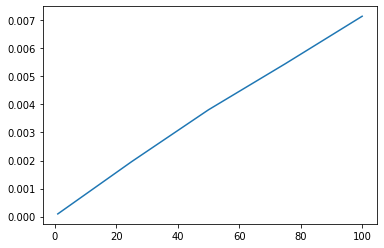

In [0]:
import annoy
from annoy import AnnoyIndex

t_a = AnnoyIndex(NUMBER_OF_FEATURES,'angular')

for i in range(NUMBER_OF_SAMPLES):
  t_a.add_item(i,fnp[i])

t_a.build(NUMBER_OF_NEIGHBOURS)

annoy_time_yaxis = []

for query_count in  query_xaxis:
  sum=0
  for index in range(query_count):
    t1 = time.time()
    result = t_a.get_nns_by_item(index,NUMBER_OF_NEIGHBOURS)
    t2 = time.time()
    sum = sum + (t2-t1)
  annoy_time_yaxis.append(sum)

print(annoy_time_yaxis)
print(query_xaxis)

import matplotlib.pyplot as plt
plt.plot(query_xaxis, annoy_time_yaxis)

[0.0042819976806640625, 0.07860422134399414, 0.15915274620056152, 0.2439098358154297, 0.3133072853088379]
[1, 25, 50, 75, 100]


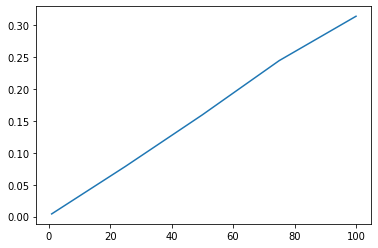

In [0]:
from sklearn.neighbors import NearestNeighbors

nbrs1 = NearestNeighbors(n_neighbors=NUMBER_OF_NEIGHBOURS, algorithm='ball_tree').fit(fnp)

sklearn1_time_yaxis = []

for query_count in  query_xaxis:
  sum=0
  fnp_batch = fnp[0:query_count]
  t1 = time.time()
  indices = nbrs1.kneighbors(fnp_batch, return_distance=False)
  t2 = time.time()
  sum = sum + (t2-t1)
  sklearn1_time_yaxis.append(sum)

print(sklearn1_time_yaxis)
print(query_xaxis)

import matplotlib.pyplot as plt
plt.plot(query_xaxis, sklearn1_time_yaxis)

[0.0064623355865478516, 0.11869573593139648, 0.24313020706176758, 0.36141443252563477, 0.47583675384521484]
[1, 25, 50, 75, 100]


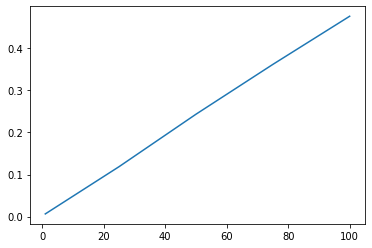

In [0]:
from sklearn.neighbors import NearestNeighbors

nbrs2 = NearestNeighbors(n_neighbors=NUMBER_OF_NEIGHBOURS, algorithm='kd_tree').fit(fnp)

sklearn2_time_yaxis = []

for query_count in  query_xaxis:
  sum=0
  fnp_batch = fnp[0:query_count]
  t1 = time.time()
  indices = nbrs2.kneighbors(fnp_batch, return_distance=False)
  t2 = time.time()
  sum = sum + (t2-t1)
  sklearn2_time_yaxis.append(sum)

print(sklearn2_time_yaxis)
print(query_xaxis)

import matplotlib.pyplot as plt
plt.plot(query_xaxis, sklearn2_time_yaxis)

[0.005602836608886719, 0.016942501068115234, 0.020728349685668945, 0.027523517608642578, 0.03310847282409668]
[1, 25, 50, 75, 100]


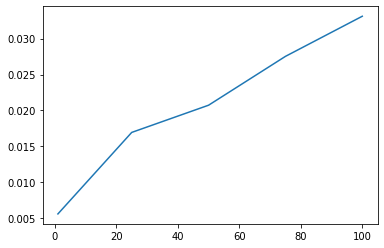

In [0]:
from sklearn.neighbors import NearestNeighbors

nbrs3 = NearestNeighbors(n_neighbors=NUMBER_OF_NEIGHBOURS, algorithm='brute').fit(fnp)

sklearn3_time_yaxis = []

for query_count in  query_xaxis:
  sum=0
  fnp_batch = fnp[0:query_count]
  t1 = time.time()
  indices = nbrs3.kneighbors(fnp_batch, return_distance=False)
  t2 = time.time()
  sum = sum + (t2-t1)
  sklearn3_time_yaxis.append(sum)

print(sklearn3_time_yaxis)
print(query_xaxis)

import matplotlib.pyplot as plt
plt.plot(query_xaxis, sklearn3_time_yaxis)

[0.004785060882568359, 0.09452986717224121, 0.195206880569458, 0.30721330642700195, 0.41117286682128906]
[1, 25, 50, 75, 100]


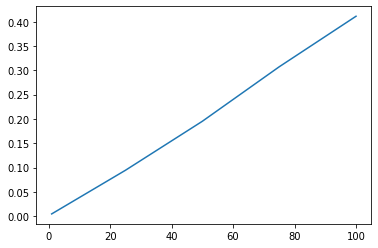

In [0]:
from nearpy import Engine
from nearpy.hashes import RandomBinaryProjections

# Create a random binary hash with 2 bits
rbp = RandomBinaryProjections('rbp', 2)

# Create engine with pipeline configuration
engine = Engine(NUMBER_OF_FEATURES, lshashes=[rbp])

for i,f in enumerate(fnp):
  engine.store_vector(f,'%d'%i)

nearpy_time_yaxis = []

for query_count in  query_xaxis:
  sum=0
  fnp_batch = fnp[0:query_count]
  for fb in fnp_batch:
    t1 = time.time()
    N = engine.neighbours(query)
    t2 = time.time()
    sum = sum + (t2-t1)
  nearpy_time_yaxis.append(sum)

print(nearpy_time_yaxis)
print(query_xaxis)

import matplotlib.pyplot as plt
plt.plot(query_xaxis, nearpy_time_yaxis)

[0.0003669261932373047, 0.0071413516998291016, 0.009884834289550781, 0.01469874382019043, 0.01995849609375]
[1, 25, 50, 75, 100]


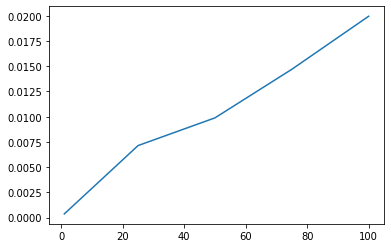

In [0]:
from ngtpy import create, Index

create(b"tmp", NUMBER_OF_FEATURES)

index = Index(b"tmp",)
index.batch_insert(fnp)

ngt_time_yaxis = []

for query_count in  query_xaxis:
  sum=0
  fnp_batch = fnp[0:query_count]
  for fb in fnp_batch:
    t1 = time.time()
    result = index.search(query, NUMBER_OF_NEIGHBOURS)
    t2 = time.time()
    sum = sum + (t2-t1)
  ngt_time_yaxis.append(sum)

print(ngt_time_yaxis)
print(query_xaxis)

import matplotlib.pyplot as plt
plt.plot(query_xaxis, ngt_time_yaxis)

[0.0001232624053955078, 0.0016710758209228516, 0.003483295440673828, 0.004981517791748047, 0.006522178649902344]
[1, 25, 50, 75, 100]


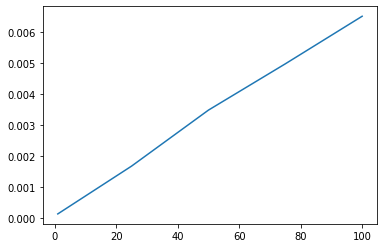

In [0]:
import mrpt

#Convert the fnp and query to type - float32

target_recall = 0.9
index = mrpt.MRPTIndex(fnp_float32)
index.build_autotune_sample(target_recall, NUMBER_OF_NEIGHBOURS)


mrpt_time_yaxis = []

for query_count in  query_xaxis:
  sum=0
  fnp_batch = fnp_float32[0:query_count]
  for fb in fnp_batch:
    t1 = time.time()
    result = index.ann(fb, return_distances=False)
    t2 = time.time()
    sum = sum + (t2-t1)
  mrpt_time_yaxis.append(sum)

print(mrpt_time_yaxis)
print(query_xaxis)

import matplotlib.pyplot as plt
plt.plot(query_xaxis, mrpt_time_yaxis)

(1, 512)
(25, 512)
(50, 512)
(75, 512)
(100, 512)
[0.00022649765014648438, 0.0015175342559814453, 0.0017123222351074219, 0.002295255661010742, 0.002724885940551758]
[1, 25, 50, 75, 100]


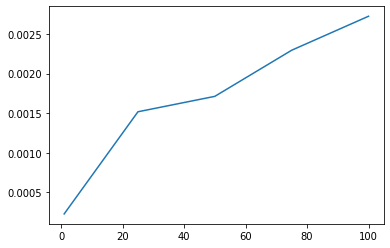

In [0]:
from pynndescent import NNDescent

#First index takes time??

index = NNDescent(fnp)
indices,distances = index.query(query_reshape, k=NUMBER_OF_NEIGHBOURS)

pynndescent_time_yaxis = []

for query_count in  query_xaxis:
  sum=0
  fnp_batch = fnp[0:query_count]
  print(fnp_batch.shape)
  t1 = time.time()
  indices,distances = index.query(fnp_batch, k=NUMBER_OF_NEIGHBOURS)
  t2 = time.time()
  sum = sum + (t2-t1)
  pynndescent_time_yaxis.append(sum)

print(pynndescent_time_yaxis)
print(query_xaxis)

import matplotlib.pyplot as plt
plt.plot(query_xaxis, pynndescent_time_yaxis)

[0.0041904449462890625, 0.00557708740234375, 0.006833553314208984, 0.00908041000366211, 0.010859489440917969]
[1, 25, 50, 75, 100]


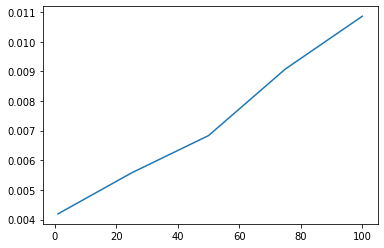

In [0]:
#!pip install faiss
#Batch Processing present

import faiss

nlist = 5  # number of clusters
quantiser = faiss.IndexFlatL2(NUMBER_OF_FEATURES)  
index = faiss.IndexIVFFlat(quantiser, NUMBER_OF_FEATURES, nlist, faiss.METRIC_L2)

index.train(fnp_float32)  # train on the database vectors
index.add(fnp_float32)   # add the vectors and update the index

faiss_time_yaxis = []

for query_count in  query_xaxis:
  sum=0
  fnp_batch = fnp_float32[0:query_count]
  t1 = time.time()
  distances, indices = index.search(fnp_batch, NUMBER_OF_NEIGHBOURS)
  t2 = time.time()
  sum = sum + (t2-t1)
  faiss_time_yaxis.append(sum)

print(faiss_time_yaxis)
print(query_xaxis)

import matplotlib.pyplot as plt
plt.plot(query_xaxis, faiss_time_yaxis)

[0.0005431175231933594, 0.008994817733764648, 0.017605066299438477, 0.025850296020507812, 0.0351719856262207]
[1, 25, 50, 75, 100]


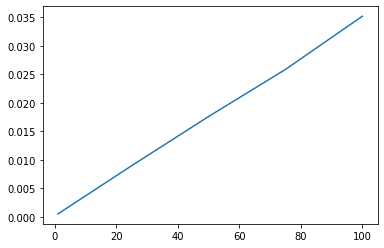

In [0]:
#!pip install rpforest
#No batch processing present

from rpforest import RPForest

model = RPForest(leaf_size=50, no_trees=10)
model.fit(fnp)

rpforest_time_yaxis = []

for query_count in  query_xaxis:
  sum=0
  fnp_batch = fnp[0:query_count]
  for fb in fnp_batch:
    t1 = time.time()
    nns = model.query(fb, NUMBER_OF_NEIGHBOURS)
    t2 = time.time()
    sum = sum + (t2-t1)
  rpforest_time_yaxis.append(sum)

print(rpforest_time_yaxis)
print(query_xaxis)

import matplotlib.pyplot as plt
plt.plot(query_xaxis, rpforest_time_yaxis)

[8.487701416015625e-05, 0.001028299331665039, 0.001856088638305664, 0.0026710033416748047, 0.003340005874633789]
[1, 25, 50, 75, 100]


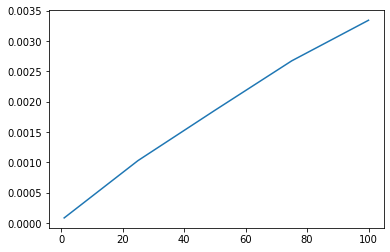

In [0]:
import hnswlib

#Batch processing present

# Declaring index
# possible options are l2, cosine or ip
p = hnswlib.Index(space = 'l2', dim = NUMBER_OF_FEATURES)

# Initing index - the maximum number of elements should be known beforehand
p.init_index(max_elements = NUMBER_OF_SAMPLES)

# Element insertion (can be called several times):
p.add_items(fnp)

hsnwlib_time_yaxis = []

for query_count in  query_xaxis:
  sum=0
  fnp_batch = fnp[0:query_count]
  t1 = time.time()
  labels, distances = p.knn_query(fnp_batch, k = NUMBER_OF_NEIGHBOURS)
  t2 = time.time()
  sum = sum + (t2-t1)
  hsnwlib_time_yaxis.append(sum)

print(hsnwlib_time_yaxis)
print(query_xaxis)

import matplotlib.pyplot as plt
plt.plot(query_xaxis, hsnwlib_time_yaxis)

[0.0002627372741699219, 0.0024220943450927734, 0.0047032833099365234, 0.007194042205810547, 0.00864553451538086]
[1, 25, 50, 75, 100]


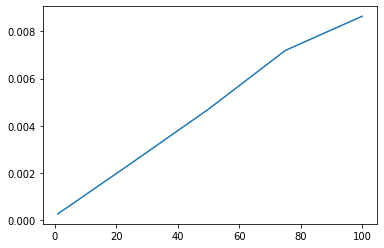

In [0]:
# initialize a new index, using a HNSW index on Cosine Similarity

import nmslib

index = nmslib.init(method='hnsw', space='cosinesimil')
index.addDataPointBatch(fnp)
index.createIndex(print_progress=True)

nmslib_hnsw_time_yaxis = []

for query_count in  query_xaxis:
  sum=0
  fnp_batch = fnp[0:query_count]
  for fb in fnp_batch:
    t1 = time.time()
    ids, distances = index.knnQuery(query, k=NUMBER_OF_NEIGHBOURS)
    t2 = time.time()
    sum = sum + (t2-t1)
  nmslib_hnsw_time_yaxis.append(sum)

print(nmslib_hnsw_time_yaxis)
print(query_xaxis)

import matplotlib.pyplot as plt
plt.plot(query_xaxis, nmslib_hnsw_time_yaxis)


[0.00013136863708496094, 0.002857685089111328, 0.0053021907806396484, 0.007272958755493164, 0.009856700897216797]
[1, 25, 50, 75, 100]


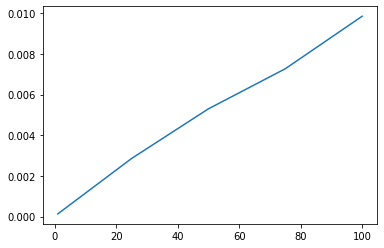

In [0]:
# initialize a new index, using a SWGRAPH index on Cosine Similarity

import nmslib

index = nmslib.init(method='sw-graph', space='cosinesimil')
index.addDataPointBatch(fnp)
index.createIndex(print_progress=True)

nmslib_swgraph_time_yaxis = []

for query_count in  query_xaxis:
  sum=0
  fnp_batch = fnp[0:query_count]
  for fb in fnp_batch:
    t1 = time.time()
    ids, distances = index.knnQuery(query, k=NUMBER_OF_NEIGHBOURS)
    t2 = time.time()
    sum = sum + (t2-t1)
  nmslib_swgraph_time_yaxis.append(sum)

print(nmslib_swgraph_time_yaxis)
print(query_xaxis)

import matplotlib.pyplot as plt
plt.plot(query_xaxis, nmslib_swgraph_time_yaxis)


[0.001489877700805664, 0.02017664909362793, 0.04000425338745117, 0.0576934814453125, 0.08083653450012207]
[1, 25, 50, 75, 100]


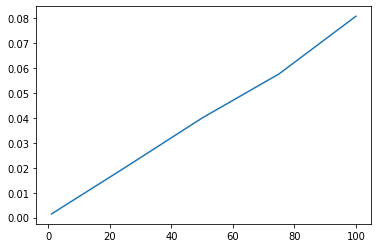

In [0]:
# initialize a new index, using a NAPP index on Cosine Similarity

import nmslib

index = nmslib.init(method='napp', space='cosinesimil')
index.addDataPointBatch(fnp)
index.createIndex(print_progress=True)

nmslib_napp_time_yaxis = []

for query_count in  query_xaxis:
  sum=0
  fnp_batch = fnp[0:query_count]
  for fb in fnp_batch:
    t1 = time.time()
    ids, distances = index.knnQuery(query, k=NUMBER_OF_NEIGHBOURS)
    t2 = time.time()
    sum = sum + (t2-t1)
  nmslib_napp_time_yaxis.append(sum)

print(nmslib_napp_time_yaxis)
print(query_xaxis)

import matplotlib.pyplot as plt
plt.plot(query_xaxis, nmslib_napp_time_yaxis)

[0.0002167224884033203, 0.003682851791381836, 0.0073888301849365234, 0.011385917663574219, 0.014229297637939453]
[1, 25, 50, 75, 100]


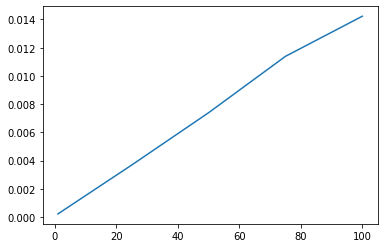

In [0]:
from n2 import HnswIndex

index = HnswIndex(NUMBER_OF_FEATURES)
for f in fnp:
    index.add_data(f)
index.build(m=5, n_threads=4)

n2_hnsw_time_yaxis = []

for query_count in  query_xaxis:
  sum=0
  fnp_batch = fnp[0:query_count]
  for fb in fnp_batch:
    t1 = time.time()
    result = index.search_by_vector(query, NUMBER_OF_NEIGHBOURS)
    t2 = time.time()
    sum = sum + (t2-t1)
  n2_hnsw_time_yaxis.append(sum)

print(n2_hnsw_time_yaxis)
print(query_xaxis)

import matplotlib.pyplot as plt
plt.plot(query_xaxis, n2_hnsw_time_yaxis)

2020-04-21 06:20:00,906 : INFO : #119 => pass 0 ...
2020-04-21 06:20:01,120 : INFO : #119 => pass 1 ...
2020-04-21 06:20:01,326 : INFO : #119 => pass 2 ...
2020-04-21 06:20:01,552 : INFO : #119 => pass 3 ...
2020-04-21 06:20:01,759 : INFO : #119 => pass 4 ...
2020-04-21 06:20:01,975 : INFO : #119 => pass 5 ...
2020-04-21 06:20:02,186 : INFO : #119 => pass 6 ...
2020-04-21 06:20:02,396 : INFO : #119 => pass 7 ...
2020-04-21 06:20:02,621 : INFO : #119 => pass 8 ...
2020-04-21 06:20:02,839 : INFO : #119 => pass 9 ...


[0.007209062576293945, 0.20321011543273926, 0.38848233222961426, 0.6042313575744629, 0.7338919639587402]
[1, 25, 50, 75, 100]


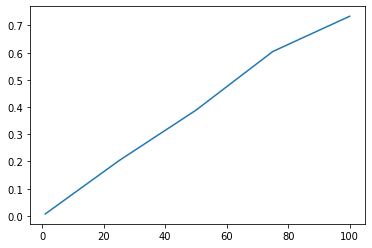

In [0]:
from panns import PannsIndex

#No Batch Processing

# create an index of Euclidean distance
p = PannsIndex(dimension=NUMBER_OF_FEATURES, metric='euclidean')

# generate a 1000 x 100 dataset
for f in fnp:
    p.add_vector(f)

# build an index of n trees and save to a file
n = 10
p.build(n)

panns_time_yaxis = []

for query_count in  query_xaxis:
  sum=0
  fnp_batch = fnp[0:query_count]
  for fb in fnp_batch:
    t1 = time.time()
    nearest_neighbor = p.query(fb, 10)
    t2 = time.time()
    sum = sum + (t2-t1)
  panns_time_yaxis.append(sum)

print(panns_time_yaxis)
print(query_xaxis)

import matplotlib.pyplot as plt
plt.plot(query_xaxis, panns_time_yaxis)

[0.01015329360961914, 0.025918006896972656, 0.049912214279174805, 0.07744622230529785, 0.09596633911132812]
[1, 25, 50, 75, 100]


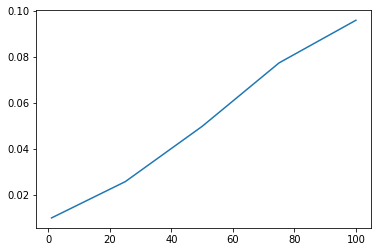

In [0]:
import pykgraph

#Batch processing present

index = pykgraph.KGraph(fnp, 'angular')  # another option is 'angular'
index.build(reverse=-1)

pykgraph_time_yaxis = []

for query_count in  query_xaxis:
  sum=0
  fnp_batch = fnp[0:query_count]
  t1 = time.time()
  knn = index.search(fnp_batch, K=NUMBER_OF_NEIGHBOURS) 
  t2 = time.time()
  sum = sum + (t2-t1)
  pykgraph_time_yaxis.append(sum)

print(pykgraph_time_yaxis)
print(query_xaxis)

import matplotlib.pyplot as plt
plt.plot(query_xaxis, pykgraph_time_yaxis)

/content/DolphinnPy
[0.003528118133544922, 0.05187201499938965, 0.07914328575134277, 0.13640379905700684, 0.16381430625915527]
[1, 25, 50, 75, 100]
/content


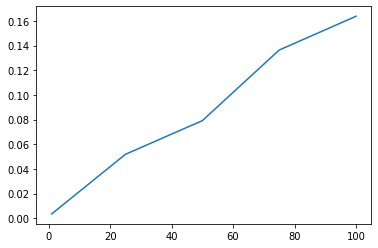

In [0]:
#!git clone https://github.com/ipsarros/DolphinnPy
#!2to3 -w DolphinnPy
%cd /content/DolphinnPy

#edited the main.py file of DolphinnPy

#Batch processing is allowed

import utils as fr
import bruteforce as bf
from dolphinn import *

num_of_probes=20

#CHANGE OF ORIGIN
#find the mean of randomly sampled points
m=fr.findmean(fnp,NUMBER_OF_FEATURES,10)

#then consider this mean as the origin
P=fr.isotropize(fnp,NUMBER_OF_FEATURES,m)
K=int(np.log2(len(P)))-2 #New Dimension

#PREPROCESSING
dol=Dolphinn(P, NUMBER_OF_FEATURES, K)

#QUERIES 
#assign keys to queries
dolphinn_time_yaxis = []

for query_count in  query_xaxis:
  sum=0
  fnp_batch = fnp[0:query_count]
  t1 = time.time()
  Q=fr.isotropize(fnp_batch,NUMBER_OF_FEATURES,m)
  solQ=dol.queries(Q, 1, num_of_probes)
  t2 = time.time()
  sum = sum + (t2-t1)
  dolphinn_time_yaxis.append(sum)

print(dolphinn_time_yaxis)
print(query_xaxis)

import matplotlib.pyplot as plt
plt.plot(query_xaxis, dolphinn_time_yaxis)

%cd ../

[0.00027489662170410156, 0.0034646987915039062, 0.006788969039916992, 0.010148048400878906, 0.012972593307495117]
[1, 25, 50, 75, 100]


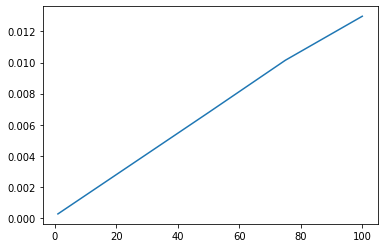

In [0]:
#!pip install FALCONN
#no batch processing

import falconn

params_cp = falconn.LSHConstructionParameters()
params_cp.dimension = NUMBER_OF_FEATURES
params_cp.lsh_family = falconn.LSHFamily.CrossPolytope
params_cp.distance_function = falconn.DistanceFunction.EuclideanSquared
params_cp.l = 50 #Number of Tables
params_cp.num_rotations = 1
params_cp.seed = 5721840

# we want to use all the available threads to set up
params_cp.num_setup_threads = 0
params_cp.storage_hash_table = falconn.StorageHashTable.BitPackedFlatHashTable
# we build 18-bit hashes so that each table has
# 2^18 bins; this is a good choise since 2^18 is of the same
# order of magnitude as the number of data points
falconn.compute_number_of_hash_functions(18, params_cp)

table = falconn.LSHIndex(params_cp)
table.setup(fnp_float32)

query_object = table.construct_query_object()
query_object.set_num_probes(50)

falconn_time_yaxis = []

for query_count in  query_xaxis:
  sum=0
  fnp_batch = fnp_float32[0:query_count]
  for fb in fnp_batch:
    t1 = time.time()
    result = query_object.find_nearest_neighbor(fb)
    t2 = time.time()
    sum = sum + (t2-t1)
  falconn_time_yaxis.append(sum)

print(falconn_time_yaxis)
print(query_xaxis)

import matplotlib.pyplot as plt
plt.plot(query_xaxis, falconn_time_yaxis)

M: 8, Ks: 256, code_dtype: <class 'numpy.uint8'>
iter: 20, seed: 123
Training the subspace: 0 / 8
Training the subspace: 1 / 8
Training the subspace: 2 / 8
Training the subspace: 3 / 8
Training the subspace: 4 / 8
Training the subspace: 5 / 8
Training the subspace: 6 / 8
Training the subspace: 7 / 8
Encoding the subspace: 0 / 8
Encoding the subspace: 1 / 8
Encoding the subspace: 2 / 8
Encoding the subspace: 3 / 8
Encoding the subspace: 4 / 8
Encoding the subspace: 5 / 8
Encoding the subspace: 6 / 8
Encoding the subspace: 7 / 8
[0.0014300346374511719, 0.03247642517089844, 0.06556534767150879, 0.07410550117492676, 0.09453034400939941]
[1, 25, 50, 75, 100]


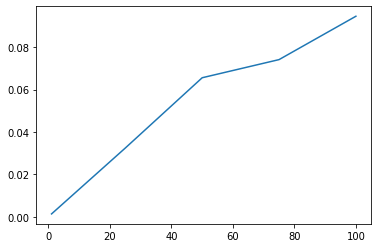

In [0]:
import nanopq
# Instantiate with M=8 sub-spaces
pq = nanopq.PQ(M=8)

# Train codewords
pq.fit(fnp_float32)

# Encode to PQ-codes
X_code = pq.encode(fnp_float32)  # (10000, 8) with dtype=np.uint8

nanopq_time_yaxis = []

for query_count in  query_xaxis:
  sum=0
  fnp_batch = fnp_float32[0:query_count]
  for fb in fnp_batch:
    t1 = time.time()
    dists = pq.dtable(query_float32).adist(X_code)
    min_n = np.argmin(dists)
    t2 = time.time()
    sum = sum + (t2-t1)
  nanopq_time_yaxis.append(sum)

print(nanopq_time_yaxis)
print(query_xaxis)

import matplotlib.pyplot as plt
plt.plot(query_xaxis, nanopq_time_yaxis)

# Final Plotting

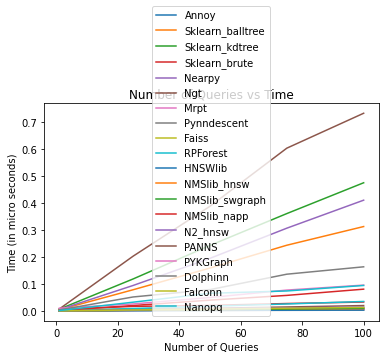

In [0]:
import matplotlib.pyplot as plt

plt.plot(query_xaxis, annoy_time_yaxis, label = "Annoy")
plt.plot(query_xaxis, sklearn1_time_yaxis, label = "Sklearn_balltree")
plt.plot(query_xaxis, sklearn2_time_yaxis, label = "Sklearn_kdtree")
plt.plot(query_xaxis, sklearn3_time_yaxis, label = "Sklearn_brute")
plt.plot(query_xaxis, nearpy_time_yaxis, label = "Nearpy")
plt.plot(query_xaxis, ngt_time_yaxis, label = "Ngt")
plt.plot(query_xaxis, mrpt_time_yaxis, label = "Mrpt")
plt.plot(query_xaxis, pynndescent_time_yaxis, label = "Pynndescent")
plt.plot(query_xaxis, faiss_time_yaxis, label = "Faiss")
plt.plot(query_xaxis, rpforest_time_yaxis, label = "RPForest")
plt.plot(query_xaxis, hsnwlib_time_yaxis, label = "HNSWlib")
plt.plot(query_xaxis, nmslib_hnsw_time_yaxis, label = "NMSlib_hnsw")
plt.plot(query_xaxis, nmslib_swgraph_time_yaxis, label = "NMSlib_swgraph")
plt.plot(query_xaxis, nmslib_napp_time_yaxis, label = "NMSlib_napp")
plt.plot(query_xaxis, n2_hnsw_time_yaxis, label = "N2_hnsw")
plt.plot(query_xaxis, panns_time_yaxis, label = "PANNS")
plt.plot(query_xaxis, pykgraph_time_yaxis, label = "PYKGraph")
plt.plot(query_xaxis, dolphinn_time_yaxis, label = "Dolphinn")
plt.plot(query_xaxis, falconn_time_yaxis, label = "Falconn")
plt.plot(query_xaxis, nanopq_time_yaxis, label = "Nanopq")

plt.xlabel('Number of Queries')
plt.ylabel('Time (in micro seconds)')
plt.title('Number of Queries vs Time')

plt.legend()
plt.show()

# TSNE and PCA Analysis


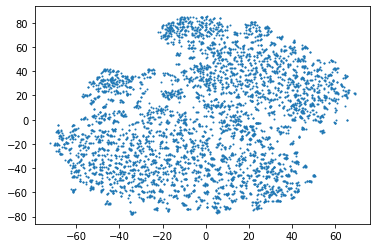

In [0]:
from sklearn.manifold import TSNE
tsne = TSNE().fit_transform(fnp)

import matplotlib.pyplot as plt
plt.scatter(tsne[:,0],tsne[:,1],s=1)
plt.show()

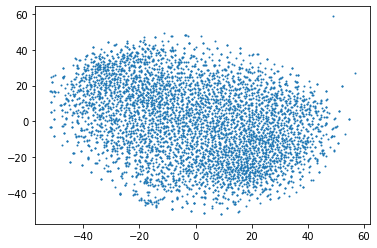

In [0]:
db2 = pd.read_pickle('/content/drive/My Drive/database2.csv') #DRGAN Features
feature = db2['feature']

fnp2 = np.ndarray(shape=(5000,320))
for f in range(5000):
  for e in range(320):
    fnp2[f][e] = feature[f][0][e]

from sklearn.manifold import TSNE
tsne = TSNE().fit_transform(fnp2)

import matplotlib.pyplot as plt
plt.scatter(tsne[:,0],tsne[:,1],s=1)
plt.show()

# Previously Saved Result

In [0]:
#Previously Saved Result

annoy_time_yaxis =  [7.200241088867188e-05, 0.0014157295227050781, 0.002628803253173828, 0.00394892692565918, 0.005234718322753906]
sklearn1_time_yaxis =  [0.00570988655090332, 0.1140604019165039, 0.22916579246520996, 0.35016465187072754, 0.45368432998657227]
sklearn2_time_yaxis =  [0.0076084136962890625, 0.15352606773376465, 0.3150651454925537, 0.46872830390930176, 0.618624210357666]
sklearn3_time_yaxis =  [0.01591348648071289, 0.017751455307006836, 0.02491903305053711, 0.03166651725769043, 0.03545212745666504]
nearpy_time_yaxis =  [0.0038115978240966797, 0.08164596557617188, 0.16394424438476562, 0.2703115940093994, 0.3486216068267822]

ngt_time_yaxis =  [0.0003712177276611328, 0.005829811096191406, 0.011814594268798828, 0.017403841018676758, 0.02355360984802246]
mrpt_time_yaxis =  [9.417533874511719e-05, 0.0016226768493652344, 0.0028290748596191406, 0.004538536071777344, 0.005991697311401367]
pynndescent_time_yaxis =  [0.0001838207244873047, 0.0009887218475341797, 0.0016102790832519531, 0.002213001251220703, 0.002943754196166992]
faiss_time_yaxis =  [0.00042319297790527344, 0.003759145736694336, 0.006796360015869141, 0.009948015213012695, 0.013050556182861328]
rpforest_time_yaxis =  [0.0006859302520751953, 0.011718511581420898, 0.021971464157104492, 0.03529047966003418, 0.04477977752685547]

hsnwlib_time_yaxis =  [9.72747802734375e-05, 0.0009877681732177734, 0.0017266273498535156, 0.002385854721069336, 0.0031015872955322266]
nmslib_hnsw_time_yaxis =  [0.000331878662109375, 0.002299785614013672, 0.004441976547241211, 0.006727933883666992, 0.008966445922851562]
nmslib_swgraph_time_yaxis =  [0.00014472007751464844, 0.0017807483673095703, 0.0034334659576416016, 0.005410194396972656, 0.006989240646362305]
nmslib_napp_time_yaxis =  [0.0019905567169189453, 0.025197982788085938, 0.04765486717224121, 0.07437944412231445, 0.09070467948913574]
n2_hnsw_time_yaxis =  [0.0003135204315185547, 0.004530668258666992, 0.008987665176391602, 0.01341867446899414, 0.018141508102416992]

panns_time_yaxis =  [0.006460666656494141, 0.16358494758605957, 0.32099151611328125, 0.4873085021972656, 0.6568706035614014]
pykgraph_time_yaxis =  [0.001657247543334961, 0.02383732795715332, 0.05013895034790039, 0.07555699348449707, 0.09687280654907227]
dolphinn_time_yaxis =  [0.0021049976348876953, 0.06052374839782715, 0.0807032585144043, 0.12660455703735352, 0.15701031684875488]
falconn_time_yaxis =  [0.0003247261047363281, 0.003453493118286133, 0.0067408084869384766, 0.009952306747436523, 0.013048648834228516]
nanopq_time_yaxis =  [0.0013968944549560547, 0.02884674072265625, 0.0565030574798584, 0.06500029563903809, 0.0697181224822998]

In [0]:
time_result = np.array([
  [7.200241088867188e-05, 0.0014157295227050781, 0.002628803253173828, 0.00394892692565918, 0.005234718322753906],
  [0.00570988655090332, 0.1140604019165039, 0.22916579246520996, 0.35016465187072754, 0.45368432998657227],
  [0.0076084136962890625, 0.15352606773376465, 0.3150651454925537, 0.46872830390930176, 0.618624210357666],
  [0.01591348648071289, 0.017751455307006836, 0.02491903305053711, 0.03166651725769043, 0.03545212745666504],
  [0.0038115978240966797, 0.08164596557617188, 0.16394424438476562, 0.2703115940093994, 0.3486216068267822],
  [0.0003712177276611328, 0.005829811096191406, 0.011814594268798828, 0.017403841018676758, 0.02355360984802246],
  [9.417533874511719e-05, 0.0016226768493652344, 0.0028290748596191406, 0.004538536071777344, 0.005991697311401367],
  [0.0001838207244873047, 0.0009887218475341797, 0.0016102790832519531, 0.002213001251220703, 0.002943754196166992],
  [0.00042319297790527344, 0.003759145736694336, 0.006796360015869141, 0.009948015213012695, 0.013050556182861328],
  [0.0006859302520751953, 0.011718511581420898, 0.021971464157104492, 0.03529047966003418, 0.04477977752685547],
  [9.72747802734375e-05, 0.0009877681732177734, 0.0017266273498535156, 0.002385854721069336, 0.0031015872955322266],
  [0.000331878662109375, 0.002299785614013672, 0.004441976547241211, 0.006727933883666992, 0.008966445922851562],
  [0.00014472007751464844, 0.0017807483673095703, 0.0034334659576416016, 0.005410194396972656, 0.006989240646362305],
  [0.0019905567169189453, 0.025197982788085938, 0.04765486717224121, 0.07437944412231445, 0.09070467948913574],
  [0.0003135204315185547, 0.004530668258666992, 0.008987665176391602, 0.01341867446899414, 0.018141508102416992],
  [0.006460666656494141, 0.16358494758605957, 0.32099151611328125, 0.4873085021972656, 0.6568706035614014],
  [0.001657247543334961, 0.02383732795715332, 0.05013895034790039, 0.07555699348449707, 0.09687280654907227],
  [0.0021049976348876953, 0.06052374839782715, 0.0807032585144043, 0.12660455703735352, 0.15701031684875488],
  [0.0003247261047363281, 0.003453493118286133, 0.0067408084869384766, 0.009952306747436523, 0.013048648834228516],
  [0.0013968944549560547, 0.02884674072265625, 0.0565030574798584, 0.06500029563903809, 0.0697181224822998]
], np.float32)
time_result = time_result * 1000
time_result = time_result.astype(np.int64)

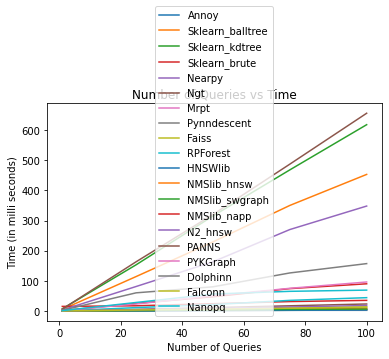

<Figure size 432x288 with 0 Axes>

In [0]:
import matplotlib.pyplot as plt

plt.plot(query_xaxis, time_result[0], label = "Annoy")
plt.plot(query_xaxis, time_result[1], label = "Sklearn_balltree")
plt.plot(query_xaxis, time_result[2], label = "Sklearn_kdtree")
plt.plot(query_xaxis, time_result[3], label = "Sklearn_brute")
plt.plot(query_xaxis, time_result[4], label = "Nearpy")

plt.plot(query_xaxis, time_result[5], label = "Ngt")
plt.plot(query_xaxis, time_result[6], label = "Mrpt")
plt.plot(query_xaxis, time_result[7], label = "Pynndescent")
plt.plot(query_xaxis, time_result[8], label = "Faiss")
plt.plot(query_xaxis, time_result[9], label = "RPForest")

plt.plot(query_xaxis, time_result[10], label = "HNSWlib")
plt.plot(query_xaxis, time_result[11], label = "NMSlib_hnsw")
plt.plot(query_xaxis, time_result[12], label = "NMSlib_swgraph")
plt.plot(query_xaxis, time_result[13], label = "NMSlib_napp")
plt.plot(query_xaxis, time_result[14], label = "N2_hnsw")

plt.plot(query_xaxis, time_result[15], label = "PANNS")
plt.plot(query_xaxis, time_result[16], label = "PYKGraph")
plt.plot(query_xaxis, time_result[17], label = "Dolphinn")
plt.plot(query_xaxis, time_result[18], label = "Falconn")
plt.plot(query_xaxis, time_result[19], label = "Nanopq")

plt.xlabel('Number of Queries')
plt.ylabel('Time (in milli seconds)')
plt.title('Number of Queries vs Time')

plt.legend()
plt.show()
plt.savefig("result.png")

In [0]:
from sklearn.manifold import TSNE
tsne = TSNE().fit_transform(fnp)
import matplotlib.pyplot as plt
plt.scatter(tsne[:,0],tsne[:,1],s=1)
plt.savefig("facenet_tsne.png")
plt.show()

In [0]:
from sklearn.decomposition import PCA
pca = PCA(2)
pca.fit(fnp)
f_pca = pca.transform(fnp)
import matplotlib.pyplot as plt
plt.scatter(f_pca[:,0],f_pca[:,1],s=5)
plt.show()

# Extra Things

In [0]:
!git clone https://github.com/puffinn/puffinn

%cd puffinn
!python3 -c 'import puffinn'
%cd ../

In [0]:
!git clone https://github.com/puffinn/puffinn

%cd puffinn
!python3 -c 'import puffinn'

import puffinn

# Construct the index using the cosine similarity measure,
# the default hash functions and 4 GB of memory.
index = puffinn.index('angular', NUMBER_OF_FEATURES, 4*1024**3)
for f in fnp:
    index.insert(f)
index.rebuild()

# Find the approximate 10 nearest neighbors.
# Each of the true 10 nearest neighbors has at least an 80% chance of being found.
result = index.search(query, 10, 0.8) 

print(result)

%cd ../

In [0]:
#Absurd Graph

%cd /content
!rm -rf pyflann
!git clone https://github.com/primetang/pyflann.git
!2to3 -w pyflann
%cd pyflann
!python setup.py install

from pyflann import *

pyflann_time_yaxis = []

for query_count in  query_xaxis:
  sum=0
  fnp_batch = fnp[0:query_count]
  t1 = time.time()
  flann = FLANN()
  result, dists = flann.nn(fnp, fnp_batch, 10, algorithm="kmeans", branching=32, iterations=7, checks=16)
  t2 = time.time()
  sum = sum + (t2-t1)
  pyflann_time_yaxis.append(sum)

print("pyflann_time_yaxis = ",pyflann_time_yaxis)
print(query_xaxis)

import matplotlib.pyplot as plt
plt.plot(query_xaxis, pyflann_time_yaxis)

%cd ../

In [0]:
!pip install datasketch

from datasketch import MinHashLSHForest, MinHash

forest = MinHashLSHForest(num_perm=NUMBER_OF_FEATURES)

for i,f in enumerate(fnp):
  mh = MinHash(num_perm=NUMBER_OF_FEATURES)
  mh.update(f)
  forest.add(str(i),mh)

forest.index()

mhq = MinHash(num_perm=NUMBER_OF_FEATURES)
mhq.update(query)

t1 = time.time()
result = forest.query(mhq, k=10)
t2 = time.time()
print(result)
print("Time : ",str(t2-t1))

'''
if your features are all floats,
they are considered distinct by minhash
even when they are close.
e.g. 1.00001 and 1.001 are different in minhash,
because they produce different bytes.
And two sets {1.0001, 2.0001} and {0.9998, 2.01}
are completely different and have a jaccard similarity of 0

'''